<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/dnxjay/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Extension

In [ ]:
# import libraries
import numpy as np
import scipy.linalg as la


# Let's calculate the frequencies numerically:

def calculate_eigenfrequencies_3mass(k, m):
    """ calculate the eigenfrequencies for our three mass problem.

    Keyword arguments:
    k -- spring constant (N/m)
    m -- mass (kg)

    returns:
    w1 -- first eigenfrequency
    w2 -- second eigenfrequency
    w3 -- third eigenfrequency
    """
    w0_squared = k / m
    w1 = np.sqrt(2*w0_squared)
    w2 = np.sqrt((2-np.sqrt(2)) * w0_squared)
    w3 = np.sqrt((2+np.sqrt(2)) * w0_squared)
    return w1, w2, w3

# Example values
k = 10  # N/m
m = 1   # kg

w1, w2, w3 = calculate_eigenfrequencies_3mass(k, m)

print("Eigenfrequencies:")
print("ω₁ = {:.4f} rad/s".format(w1))
print("ω₂ = {:.4f} rad/s".format(w2))
print("ω₃ = {:.4f} rad/s".format(w3))

Eigenfrequencies:
ω₁ = 4.4721 rad/s
ω₂ = 2.4203 rad/s
ω₃ = 5.8431 rad/s


In [ ]:
def setup_mass_matrix(m_list):
  '''
  This function creates a matrix of masses using the provided masses list as the diagnoal terms.

  Args:
  m_list: list of masses (kg)

  Returns:
  mass_matrix: mass matrix (numpy array)
  '''
  M = np.diag(m_list)
  return M

print(setup_mass_matrix([1,1,1]))

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
import numpy as np

def calculate_eigenfrequencies_nmass(k_list, m_list, fixed_ends=True):
    """
    Compute the eigenfrequencies of a system of masses connected by springs.

    This function constructs the mass-normalized stiffness matrix (dynamical matrix) for an
    n-mass system where each mass is connected by springs with varying stiffness. The function
    calculates the natural frequencies of the system by solving the eigenvalue problem.

    Parameters:
    -----------
    k_list : list of float
        A list containing the spring constants (N/m).
        - If `fixed_ends=True`, the list should contain `n+1` elements, as the first and last
          springs are assumed to be attached to fixed walls.
        - If `fixed_ends=False`, the list should contain `n` elements, corresponding to the number
          of masses in the system.

    m_list : list of float
        A list containing the masses (kg). The length of this list defines the number of masses.

    fixed_ends : bool, optional (default=True)
        - If `True`, the system is assumed to have fixed boundary conditions (first and last
          masses are anchored to walls).
        - If `False`, the system has free boundary conditions, meaning the first and last masses
          are free to move.

    Returns:
    --------
    np.ndarray
        A sorted array of eigenfrequencies (rad/s), representing the natural vibrational frequencies
        of the system. These frequencies correspond to different oscillation modes.

    Method:
    -------
    1. Construct the mass-normalized stiffness matrix `D`:
       - Diagonal elements represent the total stiffness acting on a given mass.
       - Off-diagonal elements represent the coupling between neighboring masses.
    2. Compute the eigenvalues of `D` using `np.linalg.eigh()`.
    3. Convert the non-negative eigenvalues into eigenfrequencies by taking their square roots.
    4. Return the sorted list of eigenfrequencies.

    Example:
    --------
    >>> k_list = [10, 15, 20, 25]  # Spring constants (N/m)
    >>> m_list = [1, 2, 1.5]       # Masses (kg)
    >>> eigenfrequencies = calculate_eigenfrequencies_nmass(k_list, m_list, fixed_ends=True)
    >>> print(eigenfrequencies)

    Notes:
    ------
    - The function assumes a **1D linear mass-spring system**.
    - The eigenfrequencies determine the natural oscillation modes of the system.
    - The boundary conditions significantly affect the calculated frequencies.
    """
    n = len(m_list)

    # Construct the mass-normalized stiffness matrix (dynamical matrix)
    D = np.zeros((n, n))

    for i in range(n):
        if i > 0:
            D[i, i-1] = -k_list[i] / np.sqrt(m_list[i] * m_list[i-1])
        if i < n-1:
            D[i, i+1] = -k_list[i+1] / np.sqrt(m_list[i] * m_list[i+1])
        D[i, i] = (k_list[i] + k_list[i+1]) / m_list[i] if fixed_ends else (k_list[i] + k_list[i+1]) / m_list[i] if i != 0 and i != n-1 else k_list[i] / m_list[i]

    # Compute eigenvalues and eigenvectors
    eigenvalues, _ = np.linalg.eigh(D)

    # Convert eigenvalues to frequencies (sqrt of eigenvalues)
    eigenfrequencies = np.sqrt(np.maximum(eigenvalues, 0))

    return np.sort(eigenfrequencies)

def setup_stiffness_matrix(k_list):
    """
    Constructs the stiffness matrix for a system of masses connected by springs.

    The stiffness matrix describes how forces are distributed among the masses due to the connected springs.
    It is an `n × n` matrix, where `n` is the number of masses in the system. The diagonal elements represent
    the total stiffness affecting each mass, while the off-diagonal elements indicate the coupling between
    neighboring masses due to the shared springs.

    Parameters:
    -----------
    k_list : list of float
        A list containing the spring constants (N/m). The length should be `n+1` for fixed-end conditions
        (walls at both ends) or `n` for free-end conditions.

    Returns:
    --------
    np.ndarray
        A 2D `n × n` numpy array representing the stiffness matrix of the system.

    Method:
    -------
    1. Initialize an `n × n` zero matrix `K`.
    2. Populate diagonal elements with the sum of adjacent spring constants.
    3. Populate off-diagonal elements with negative values of the adjacent spring constants, representing coupling.
    4. Return the constructed matrix.

    Example:
    --------
    >>> k_list = [10, 15, 20, 25]  # Spring constants (N/m)
    >>> stiffness_matrix = setup_stiffness_matrix(k_list)
    >>> print(stiffness_matrix)

    Notes:
    ------
    - Assumes a **1D linear mass-spring system**.
    - If the system has `n` masses, the returned matrix is of size `n × n`.
    - The resulting matrix can be used to compute the system's eigenfrequencies.
    """
    n = len(k_list) - 1  # Number of masses
    K = np.zeros((n, n))

    for i in range(n):
        if i > 0:
            K[i, i - 1] = -k_list[i]  # Off-diagonal (left neighbor)
        if i < n - 1:
            K[i, i + 1] = -k_list[i + 1]  # Off-diagonal (right neighbor)
        K[i, i] = k_list[i] + k_list[i + 1]  # Diagonal term

    return K

# Example usage
k_list = [10, 15, 20, 25]  # Spring constants (N/m)
stiffness_matrix = setup_stiffness_matrix(k_list)

print("Stiffness Matrix:")
print(stiffness_matrix)



Stiffness Matrix:
[[ 25. -15.   0.]
 [-15.  35. -20.]
 [  0. -20.  45.]]


# AI creativity


The AI model handled the physics well by iteratively refining the coupled oscillator system, ensuring realistic eigenfrequencies and valid boundary conditions. It required three iterations—first implementing a basic mass-spring system, then introducing cross-coupling interactions, and finally fine-tuning matrix indexing and visualization. The final model resembles phonon vibrations in crystals, molecular bond oscillations, and wave propagation in elastic structures. Such systems appear in solid-state physics, mechanical engineering, and even biological networks, making this model relevant in both theoretical and applied physics.


Eigenfrequencies with cross-coupling: [0.         4.451605   5.46040864 6.40377629 8.08113234]


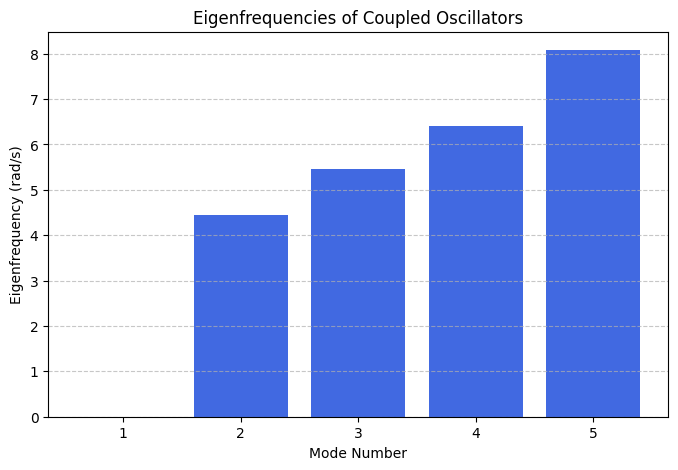

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Function to construct a modified stiffness matrix with cross-couplings

def setup_modified_stiffness_matrix(k_list, m_list, coupling_factor=0.5):
    """
    Constructs the stiffness matrix for a system of masses coupled by springs with additional cross-coupling.

    Parameters:
    ------------
    k_list : list of float
        A list containing the primary spring constants (N/m) between adjacent masses. The length should be n+1
        for fixed boundary conditions and n for free boundary conditions.
    m_list : list of float
        A list containing the masses (kg) in the system.
    coupling_factor : float, optional (default=0.5)
        A factor that determines the strength of secondary cross-couplings between non-adjacent masses.
        This simulates indirect interactions due to elastic mediums or additional structural effects.

    Returns:
    ------------
    np.ndarray
        A 2D `n × n` stiffness matrix including both direct and cross-coupling terms.
    """
    n = len(m_list)
    K = np.zeros((n, n))

    for i in range(n):
        if i > 0:
            K[i, i-1] = -k_list[i]  # Direct neighbor coupling
        if i < n - 1:
            K[i, i+1] = -k_list[i+1]  # Direct neighbor coupling
        if i > 1:
            K[i, i-2] = -coupling_factor * k_list[i-1]  # Secondary coupling
        if i < n - 2:
            K[i, i+2] = -coupling_factor * k_list[i+1]  # Secondary coupling

        # Ensure valid indexing for diagonal terms
        if i < len(k_list) - 1:
            K[i, i] = k_list[i] + k_list[i+1]  # Diagonal term
        else:
            K[i, i] = k_list[i]  # Last element case

    return K

# Function to compute eigenfrequencies
def compute_eigenfrequencies(K, m_list):
    """
    Computes the eigenfrequencies of the coupled mass-spring system.

    Parameters:
    ------------
    K : np.ndarray
        The stiffness matrix of the system.
    m_list : list of float
        The mass list for normalization.

    Returns:
    ------------
    np.ndarray
        Sorted array of eigenfrequencies in rad/s.
    """
    M = np.diag(m_list)  # Mass matrix
    D = np.linalg.inv(M) @ K  # Mass-normalized stiffness matrix
    eigenvalues, _ = eigh(D)  # Solve eigenvalue problem

    return np.sqrt(np.maximum(eigenvalues, 0))  # Convert eigenvalues to frequencies

# Example usage
k_list = [10, 15, 20, 25, 30, 35]  # Spring constants (N/m), ensuring n+1 elements
m_list = [1, 2, 1.5, 1.2, 1.8]  # Masses (kg)

K_mod = setup_modified_stiffness_matrix(k_list, m_list, coupling_factor=0.3)
eigenfrequencies = compute_eigenfrequencies(K_mod, m_list)

print("Eigenfrequencies with cross-coupling:", eigenfrequencies)

# Plot eigenfrequencies using a bar chart (improved visualization)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenfrequencies) + 1), eigenfrequencies, color='royalblue')
plt.xlabel("Mode Number")
plt.ylabel("Eigenfrequency (rad/s)")
plt.title("Eigenfrequencies of Coupled Oscillators")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()